# Group Project part 03

#### Deadline for the code submission: October 15th at 08:59 am CET

#### Reminder
- your group is the one assigned to you by the University.
- one goal of this project is to learn how to work as a group, which is the standard in the tech industry. Therefore you need to resolve group issues on your own, as a group.
- if you did not manage to resolve the group issues on your own, you need to escalate to the teacher early, not last minute.
- if the group splits, it would result in a 0 for the whole group.

**Penalty for unexcused absence or lateness**:
- If you are absent or late on presentation day without an official excuse, you will receive 0 for the presentation part of the group project.
- If you are late without an official excuse and can still make it to the presentation of your team, you will still receive 0 for the presentation part of the group project.

## Objective
In this project, you utilise your skills to :
- collect data through multiple APIs and open source datasets, for both quantitative and qualitative data
- merge data from different sources
- describe and analyse datasets
- uncover patterns, insights
- calculate aggregated measures, statistics
- create compelling data visualisations
- write clean code
- tell a story and convince your audience

Each group can pick one and one only scenario among the following ones.

Be mindful to pick a topic that enables enough data collection and analysis in order to showcase all the skills gathered during the course, listed above.

### Scenario 01: Become a Business Manager

Your task is to design a local business that leverages data from various APIs to make informed, strategic decisions. Whether you're launching a street food stand, a drink shop, or another local venture, your team will gather and analyze relevant data —such as foot traffic, weather patterns, customer trends, or competitor insights— to shape your business plan. Your final deliverable will be a data-supported report and/or presentation to a management board, demonstrating how your findings guide key decisions in operations, marketing, or product offerings. The ultimate goal: to optimize performance and increase the chances of business success. Will your business thrive in today’s data-driven world?
Examples:
- lemonade stands business
- food truck business
- delivery service

### Scenario 02: Fact Check Popular beliefs

You are part of a fact-checking research team investigating common beliefs, trending opinions, or viral social media claims (e.g. “drinking lemon water boosts metabolism” or “blue light ruins your sleep”). Your goal is to dig into reliable sources, data, and expert opinions to determine whether these beliefs hold up under scrutiny. Use data to challenge or prove real-world claims with clear, persuasive insights. Drawing on research, statistics, and visual evidence, your team will present a well-supported explanation to help your audience separate fact from fiction.

You may also choose to divide the group into two sides—one defending the belief and the other challenging it—before presenting your findings in a debate or side-by-side analysis.

Examples:
- Electric cars are always better for the environment
- Areas with more green space have better physical and mental health outcomes.
- Does public sentiment on social media predict stock market trends?

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 06 - Clean and clear visualisations

Create **data visualisations** that clearly state your point and support your decision-making.


**Presentation: present each data visualisation and integrate them in your storytelling. Explain why they are relevant for your decision-making.**

These graphs are essential to our storytelling. We start by showing NYC's higher average crime rate. Then we show that Chicago's crime rate has seen a much larger drop over the shown years. Therefore, we zoom into Chicago's milestones (milestones here defined as certain policy changes/ expansions regarding surveillance) and their possible link to crime rates. Finally, we graph the crime rates of the four key wards we have identified earlier.

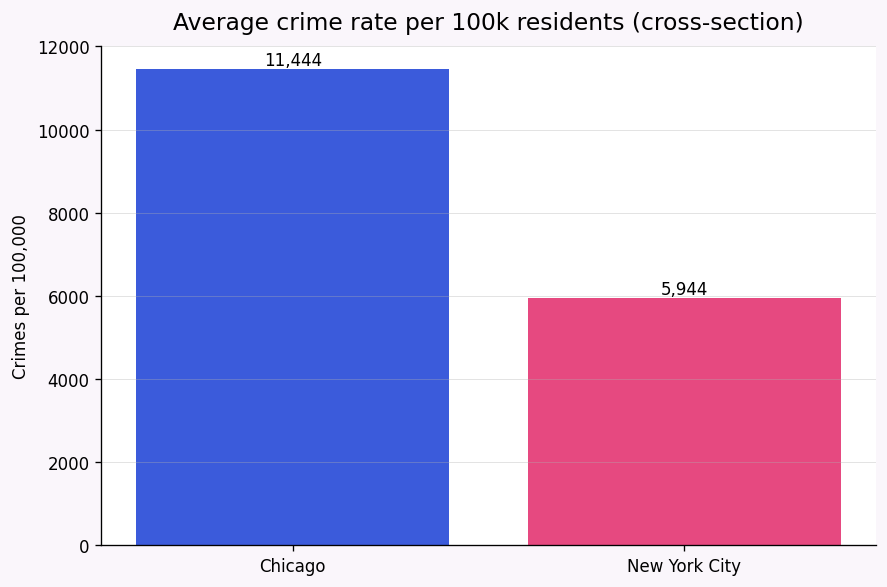

Saved to /content/drive/MyDrive/Group_Project/data/nyc_chi_cross_section_avg.png


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

DATA_PATH = "/content/drive/MyDrive/Group_Project/data/final_df_per_100k.csv"
OUT_PATH  = "/content/drive/MyDrive/Group_Project/data/nyc_chi_cross_section_avg.png"

df = pd.read_csv(DATA_PATH)
df["year"] = df["year"].astype(int)

avg = (df[df["city"].isin(["Chicago", "New York City"])]
         .groupby("city", as_index=True)["crime_rate_per_100k"]
         .mean()
         .reindex(["Chicago","New York City"]))


fig, ax = plt.subplots(figsize=(7.5,5), dpi=120)
fig.patch.set_facecolor("#faf6fb")
ax.set_facecolor("#ffffff")

palette = {"Chicago": "#3b5bdb", "New York City": "#e64980"}
colors = [palette[idx] for idx in avg.index]

bars = ax.bar(avg.index, avg.values, color=colors)

ax.set_title("Average crime rate per 100k residents (cross-section)", fontsize=14, pad=10)
ax.set_ylabel("Crimes per 100,000")
ax.set_xlabel("")

ax.grid(axis="y", linewidth=0.6, alpha=0.35)
for spine in ["top","right"]:
    ax.spines[spine].set_visible(False)

for b in bars:
    v = b.get_height()
    ax.text(b.get_x() + b.get_width()/2, v,
            f"{v:,.0f}", ha="center", va="bottom", fontsize=10)

plt.tight_layout()
plt.savefig(OUT_PATH, dpi=200, facecolor=fig.get_facecolor())
plt.show()

print(f"Saved to {OUT_PATH}")


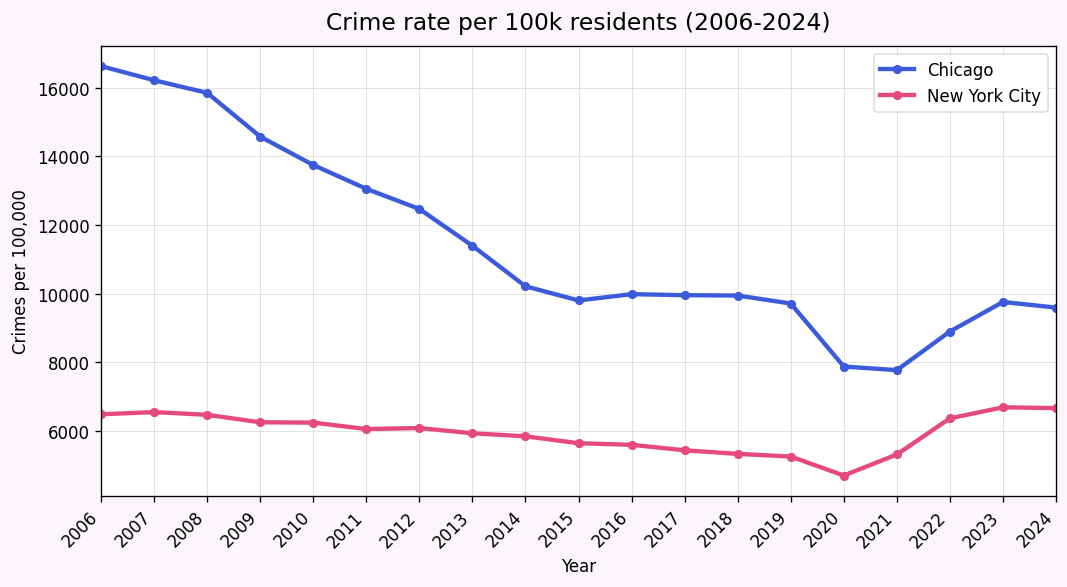

Saved to /content/drive/MyDrive/Group_Project/data/nyc_chi_linechart.png


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

DATA_PATH = "/content/drive/MyDrive/Group_Project/data/final_df_per_100k.csv"
OUT_PATH  = "/content/drive/MyDrive/Group_Project/data/nyc_chi_linechart.png"

df = pd.read_csv(DATA_PATH)
keep = (df[df["city"].isin(["Chicago", "New York City"])]
          .loc[:, ["city", "year", "crime_rate_per_100k"]]
          .copy())

keep["year"] = keep["year"].astype(int)

fig, ax = plt.subplots(figsize=(9,5), dpi=120)
fig.patch.set_facecolor("#faf6fb")
ax.set_facecolor("#ffffff")

palette = {"Chicago": "#3b5bdb", "New York City": "#e64980"}

years = list(range(2006, 2025))

for city, group in keep.groupby("city"):
    g = (group.set_index("year")
             .reindex(years)
             .rename_axis("year")
             .reset_index())

    ax.plot(
        g["year"], g["crime_rate_per_100k"],
        marker="o", linewidth=2.6, markersize=4.5,
        label=city, color=palette[city]
    )

ax.set_title("Crime rate per 100k residents (2006-2024)", fontsize=14, pad=10)
ax.set_xlabel("Year")
ax.set_ylabel("Crimes per 100,000")

ax.set_xlim(2006, 2024)
ax.set_xticks(years)
for label in ax.get_xticklabels():
    label.set_rotation(45)
    label.set_ha("right")

ax.grid(True, which="major", linewidth=0.6, alpha=0.35)

leg = ax.legend(frameon=True)
leg.get_frame().set_alpha(0.9)
leg.get_frame().set_edgecolor("#dddddd")

plt.tight_layout()
plt.savefig(OUT_PATH, dpi=200, facecolor=fig.get_facecolor())
plt.show()

print(f"Saved to {OUT_PATH}")

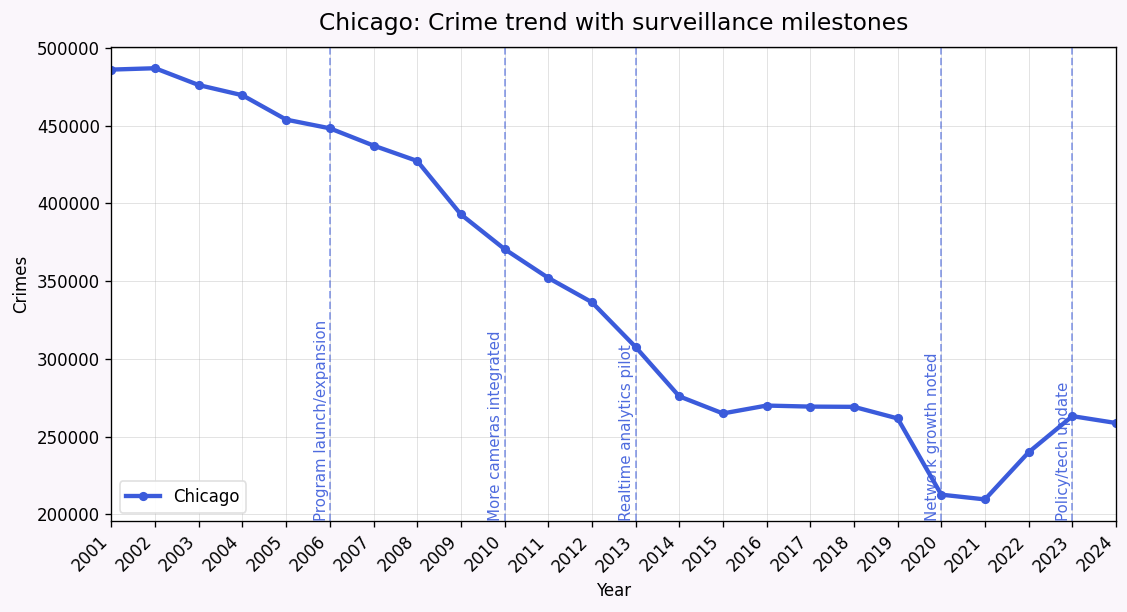

Saved to: /content/drive/MyDrive/Group_Project/data/chicago_crime_with_milestones.png


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


DATA_PATH = "/content/drive/MyDrive/Group_Project/data/crime_chicago.csv"
OUT_PATH  = "/content/drive/MyDrive/Group_Project/data/chicago_crime_with_milestones.png"

df = pd.read_csv(DATA_PATH, usecols=["year", "crime_count"]).copy()
df["year"] = df["year"].astype(int)

years = list(range(2001, 2025))
g = (df.set_index("year")
       .reindex(years)
       .rename_axis("year")
       .reset_index())

milestones = [
    (2006, "Program launch/expansion"),
    (2010, "More cameras integrated"),
    (2013, "Realtime analytics pilot"),
    (2020, "Network growth noted"),
    (2023, "Policy/tech update"),
]

fig, ax = plt.subplots(figsize=(9.5,5.2), dpi=120)
fig.patch.set_facecolor("#faf6fb")
ax.set_facecolor("#ffffff")

chi_color = "#3b5bdb"

ax.plot(
    g["year"], g["crime_count"],
    color=chi_color, marker="o",
    linewidth=2.6, markersize=4.5,
    label="Chicago"
)


for yr, label in milestones:
    ax.axvline(yr, color=chi_color, linestyle="--", linewidth=1.2, alpha=0.5)
    NUDGE = 0.2
    ax.text(yr - NUDGE, ax.get_ylim()[0], label,
        rotation=90, va="bottom", ha="center",
        fontsize=9, color=chi_color, alpha=0.9, clip_on=False)


ax.set_title("Chicago: Crime trend with surveillance milestones", fontsize=14, pad=10)
ax.set_xlabel("Year")
ax.set_ylabel("Crimes")
ax.set_xlim(2001, 2024)
ax.set_xticks(years)
for lbl in ax.get_xticklabels():
    lbl.set_rotation(45)
    lbl.set_ha("right")

ax.grid(True, which="major", linewidth=0.6, alpha=0.35)
leg = ax.legend(frameon=True)
leg.get_frame().set_alpha(0.9)
leg.get_frame().set_edgecolor("#dddddd")

plt.tight_layout()
plt.savefig(OUT_PATH, dpi=200, facecolor=fig.get_facecolor())
plt.show()

print(f"Saved to: {OUT_PATH}")


Saved figure → /content/drive/MyDrive/Group_Project/data/ward_comparison_rates_2012_2024.png


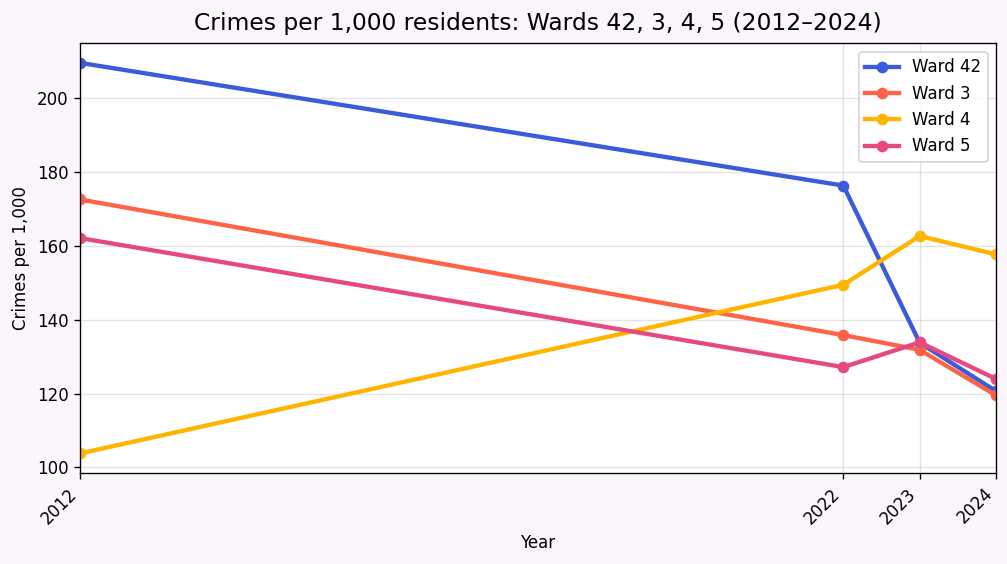

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

BASE = Path("/content/drive/MyDrive/Group_Project/data")
IN_FILE = BASE / "ward42_3_4_5_2012_2022_2023_2024.csv"

years = [2012, 2022, 2023, 2024]
wards = [42, 3, 4, 5]

df = pd.read_csv(IN_FILE)
df["ward"] = df["ward"].astype(int)
df["year"] = df["year"].astype(int)
df["crime_per_1000"] = df["crime_per_1000"].astype(float)

df = df[df["ward"].isin(wards) & df["year"].isin(years)]

fig, ax = plt.subplots(figsize=(8.5, 4.8), dpi=120)
fig.patch.set_facecolor("#faf6fb")
ax.set_facecolor("#ffffff")

colors = {42:"#3b5bdb", 3:"#ff6347", 4:"#ffb400", 5:"#e64980"}

for w in wards:
    g = df[df["ward"] == w].sort_values("year")
    ax.plot(
        g["year"], g["crime_per_1000"],
        marker="o", lw=2.6, label=f"Ward {w}",
        color=colors.get(w)
    )

ax.set_title(
    f"Crimes per 1,000 residents: Wards {', '.join(map(str, wards))} ({min(years)}–{max(years)})",
    fontsize=14, pad=8
)
ax.set_xlabel("Year")
ax.set_ylabel("Crimes per 1,000")
ax.set_xlim(min(years), max(years))
ax.set_xticks(years)

for lbl in ax.get_xticklabels():
    lbl.set_rotation(45)
    lbl.set_ha("right")

ax.grid(True, alpha=0.35)
ax.legend()
plt.tight_layout()

out_png = BASE / f"ward_comparison_rates_{min(years)}_{max(years)}.png"
plt.savefig(out_png, dpi=200, facecolor=fig.get_facecolor())
print("Saved figure →", out_png)

plt.show()


## 07 - Presentation

> Make a presentation about your scenario, the data you've collected and the direction you're taking in the next months.


- describe your scenario and plant the context
- specify the location and the timeframe
- describe the APIs and the data collected, why they are relevant
- explain the steps your team took in order to get to a clean and structured dataset
- display the statistics and relevant data visualisations that helped you make informed decisions.
- draw the conclusions based on the data analysis you have performed.
- create a good story!

In [ ]:
import pandas as pd
import statsmodels.formula.api as smf

BASE = "/content/drive/MyDrive/Group_Project/data"
big_merge_crime_with_osm = pd.read_csv(f"{BASE}/big_merge_crime_with_osm.csv")

POLICY_YEAR = 2010

big_merge_crime_with_osm["Chicago"] = (big_merge_crime_with_osm["city"] == "Chicago").astype(int)
big_merge_crime_with_osm["Post"] = (big_merge_crime_with_osm["year"] >= POLICY_YEAR).astype(int)

model_df = big_merge_crime_with_osm[["crime_rate_per_100k","Chicago","Post","year","city"]].dropna()

did = smf.ols(
    "crime_rate_per_100k ~ Chicago*Post + C(year)",
    data=model_df
).fit(cov_type="HC1")

ate_name = "Chicago:Post"
b = float(did.params[ate_name])
lo, hi = did.conf_int().loc[ate_name].tolist()
p = float(did.pvalues[ate_name])

print(did.summary().tables[1])
print(f"\nDiD (policy={POLICY_YEAR}): Chicago×Post = {b:,.1f} per 100k "
      f"[{lo:,.1f}, {hi:,.1f}], p={p:.3g}")

                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        6868.2625    441.307     15.563      0.000    6003.317    7733.208
C(year)[T.2007]  -173.3700    432.351     -0.401      0.688   -1020.763     674.023
C(year)[T.2008]  -396.7450    404.484     -0.981      0.327   -1189.519     396.029
C(year)[T.2009] -1142.4950    689.204     -1.658      0.097   -2493.311     208.321
C(year)[T.2010]  1884.0337   1514.138      1.244      0.213   -1083.622    4851.689
C(year)[T.2011]  1444.0837   1266.218      1.140      0.254   -1037.658    3925.825
C(year)[T.2012]  1164.5987    966.760      1.205      0.228    -730.215    3059.413
C(year)[T.2013]   553.1287    529.275      1.045      0.296    -484.231    1590.489
C(year)[T.2014]   -81.3763    201.425     -0.404      0.686    -476.161     313.409
C(year)[T.2015]  -388.1213    247.821     -1.566      0.117    -873.842     

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 21, but rank is 20
  warnings.warn('covariance of constraints does not have full '


What we have built:
- a clean city-year panel with crime rates per 100k, counts, population, and socioeconomics
- OSM snapshot of CCTV and police locations, scaled per 100k
- a Chicago ward case study (42 vs 38)
- an illustrative model comparing Chicago to NYC

Descriptive hard facts:
- Levels: Chicago's average crime rate is ~1.9x NYC's despite ~6x the mapped CCTV per 100k and ~1.5x the mapped police locations per 100k (OSM snapshot)
- Trends: 2006 --> 2024, Chicago fell ~42% in crime per 100k, NYC rose ~3%
- Within Chicago (wards): 42 and 38 both decline more than the city average; Ward 42' drop is slightly larger
- Socioeconomics: NYC shows higher median income and lower unemployment on average—patterns that align with its lower crime levels

Milestones Chicago:
- We overlay Chicago surveillance milestones at 2006 (launch/expansion), 2010 (integration growth), 2016 (further expansion/analytics) on the crime-rate line
- Around these dates, Chicago's rate continues to trend downward, especially post 2010

Simple Model:
- Large negative interaction --> descriptive diversion

Conclusion:
- Cross-section: "More mapped cameras --> lower crime" is not supported, Chicago has far more mapped CCTV yet higher crime levels than NYC
- Over time: Chicago's sizeable decline vs NYC is real,  it coincides with known milestones (2006/2010/2016), but this does not prove surveillance caused the drop

Limitations:
- OSM is a present-day mapping snapshot (not a historical camera series)
- Milestones are known calendar points, not counts of added devices
- Two-city comparison is sensitive to differences in policing/policy

With the data we have, mass surveillance alone does not explain safer cities. Chicago's decline (particularly after 2010 and 2016 milestones) is descriptively strong, but not causal.




